In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import os 
import re
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

%matplotlib inline

In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=1.8, color='black')

fontdict={'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

# Experimental

In [3]:
# experimentals from takashi and NIST pdf 
takashi_39 = [0.7618811881188119, 8.989985059887063,
0.8277227722772278, 9.601390190169914,
0.8675742574257426, 9.830113190347168,
0.9524752475247524, 10.3640956167228,
1.0373762376237623, 10.744625357676433,
1.124009900990099, 11.176242688207441,
1.214108910891089, 11.224101694056873,
1.305940594059406, 10.964992023499027,
1.3995049504950496, 10.603517257096554]


takashi_50= [0.8121287128712872, 15.68891646197868,
0.8814356435643564, 16.402496771416274,
0.9992574257425744, 16.807399154237675,
1.0962871287128713, 17.340938441670257,
1.2504950495049505, 17.233002456255857,
1.4116336633663367, 15.641437289509003]

takashi_39_x = [value for id, value in enumerate(takashi_39) if id%2==0]
takashi_39_y = [value for id, value in enumerate(takashi_39) if id%2!=0]
takashi_50_x = [value for id, value in enumerate(takashi_50) if id%2==0]
takashi_50_y = [value for id, value in enumerate(takashi_50) if id%2!=0]

In [4]:
needham_phis_35 =  [0.5, 0.6153846153846154,0.7307692307692307, 1.0,
 1.0769230769230769,
 1.653846153846154,
 2.576923076923077,
 2.8076923076923075,
 3.038461538461538,
 3.269230769230769,
 3.3846153846153846]

needham_speeds_35 = [0.09012849413889981*100, 0.11231766256246001*100, 10.75444144930893, 100*0.0853988588174265,
 8.14971921218096,
 5.36655801999534,
 0.78155235507203,
 0.45536087139167997,
 0.27914087451822,
 0.17977387177206,
 0.12701256968741]

In [5]:
needham_phis_50 = [0.5,
 0.6153846153846154,
 1.653846153846154,
 2.0,
 2.923076923076923,
 3.038461538461538,
 3.1538461538461537,
 3.269230769230769,
 3.3846153846153846,
 3.615384615384615,
 3.730769230769231]

needham_speeds_50 = [13.973082454372552,
 15.73251593910494,
 7.82310478432595,
 3.99286406868991,
 0.51220658372129,
 0.40067897300835,
 0.31121840645532,
 0.24733277640727,
 0.19238143564727,
 0.11630490032999001,
 0.08504687088493]

# before project started 

In [6]:
#217, with different Z's 
#nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene/ #142 species

#Z = .35
tetra_phis_35_percent = []
tetra_speeds_35_percent = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene_Fluorine_library/flamespeeds_142_39.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    tetra_phis_35_percent.append(phi)
    tetra_speeds_35_percent.append(velocity)
    
# Z=.50
tetra_phis_50_percent = []
tetra_speeds_50_percent = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/2,3,3,3-tetrafluoropropene_Fluorine_library/flamespeeds_142_50.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    tetra_phis_50_percent.append(phi)
    tetra_speeds_50_percent.append(velocity)
     
        
#Needham, with 35% and 50%

#Z = .35
needham_phis_35 = []
needham_speeds_35 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/Needham_model/flamespeeds/flamespeeds_39.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    needham_phis_35.append(phi)
    needham_speeds_35.append(velocity)
    
# Z=.50
needham_phis_50 = []
needham_speeds_50 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/Needham_model/flamespeeds/flamespeeds_50.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    needham_phis_50.append(phi)
    needham_speeds_50.append(velocity)



#NIST, .35 and .50 
#nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/

#Z = .35
NIST_phis_35 = []
NIST_speeds_35 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/flamespeeds/flamespeeds_39_oxygen.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    NIST_phis_35.append(phi)
    NIST_speeds_35.append(velocity)

#Z = .50
NIST_phis_50 = []
NIST_speeds_50 = []
new_calc_normal_air=pd.read_csv('/work/westgroup/nora/Code/projects/halogens/refrigerants/blends/redos_for_march_conference/Papas/NIST_model/flamespeeds/flamespeeds_50_oxygen.csv')
for column in list(new_calc_normal_air.columns.values): 
    match = re.search('([0-9]\.[0-9]+)',column)
    phi = float(match.group(1))
    velocity = new_calc_normal_air[column][0]*100
    NIST_phis_50.append(phi)
    NIST_speeds_50.append(velocity)
    
#Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/

csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_39/') if '.csv' in x]
phis_39_Fluorine_lib = []
speeds_39_Fluorine_lib = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_39/{file}')
    velocity = df['velocity'][0]
    phis_39_Fluorine_lib.append(phi)
    speeds_39_Fluorine_lib.append(velocity*100)
    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_50/') if '.csv' in x]
phis_50_Fluorine_lib = []
speeds_50_Fluorine_lib = []
for file in csv_files: 
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/data_50/{file}')
    velocity = df['velocity'][0]
    phis_50_Fluorine_lib.append(phi)
    speeds_50_Fluorine_lib.append(velocity*100)
    
#Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_50') if '.csv' in x]
phis_50_RMG_NIST_core = []
speeds_50_RMG_NIST_core = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_RMG_NIST_core.append(phi)
    speeds_50_RMG_NIST_core.append(velocity*100)

    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39') if '.csv' in x]
phis_39_RMG_NIST_core = []
speeds_39_RMG_NIST_core = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_RMG_NIST_core.append(phi)
    speeds_39_RMG_NIST_core.append(velocity*100)

In [7]:
_39_dict = {}
for x, y in zip(phis_39_RMG_NIST_core, speeds_39_RMG_NIST_core):
    _39_dict[x]=y
    
_50_dict = {}
for x, y in zip(phis_50_RMG_NIST_core, speeds_50_RMG_NIST_core):
    _50_dict[x]=y

In [8]:
sorted_39 = [_39_dict[x] for x in sorted(_39_dict.keys())]
sorted_50 = [_50_dict[x] for x in sorted(_50_dict.keys())]

# 4FP building for ESSCI

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


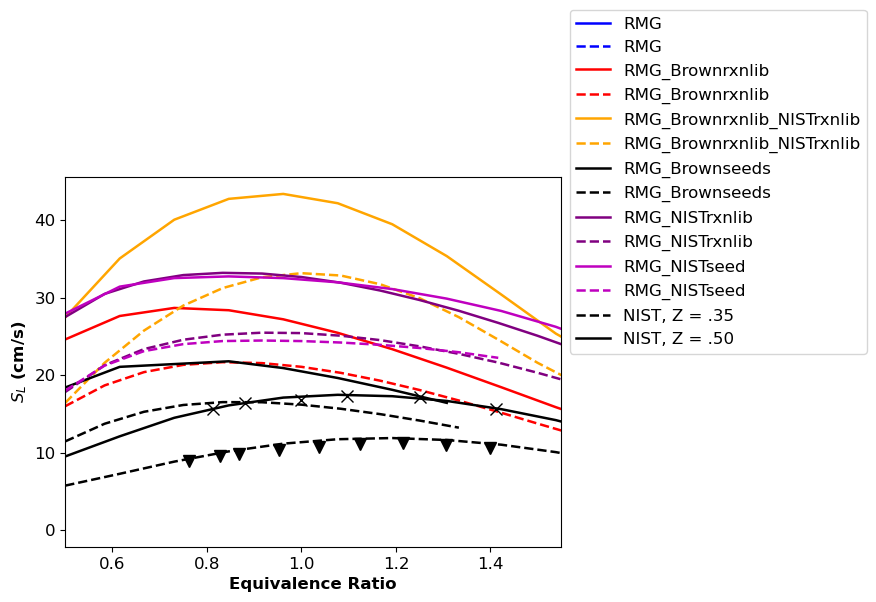

In [9]:

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 



_4fp_path = '/work/westgroup/nora/Code/projects/PFAS/ESSCI/models/RMG/4FP/'

folder_names = [x for x in os.listdir(_4fp_path) if '.ipynb' not in x]
colors = ['b','r','orange','black','purple','m']
# folder_names = ["RMG"]
# colors=['darkgreen']

for folder_name,c in zip(folder_names,colors):
    phis_50 = []
    speeds_50 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_50/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_50/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_50.append(phi)
        speeds_50.append(velocity*100)
    ax1.plot(phis_50, speeds_50, '-', color=c,label=folder_name)
             
    phis_39 = []
    speeds_39 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_39/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_39/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_39.append(phi)
        speeds_39.append(velocity*100)
    ax1.plot(phis_39, speeds_39, '--', color=c,label=folder_name)

    
    
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='black', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'black', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,1.55)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')

#legend
# legend_elements = [Line2D([0], [0], color='grey', lw=3, label='Z = .39',  linestyle='--'),
#                    Line2D([0], [0], color='grey', lw=3, label='Z = .50', linestyle='-'),
#                    Patch(facecolor='r', label='previous RMG'), 
#                    Patch(facecolor='g', label='current RMG'),  
#                    Patch(facecolor='black', label='NIST'), 
#                   ]


#plt.legend(handles=legend_elements, fontsize=12,bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.legend(bbox_to_anchor=(1.0, 0.5))

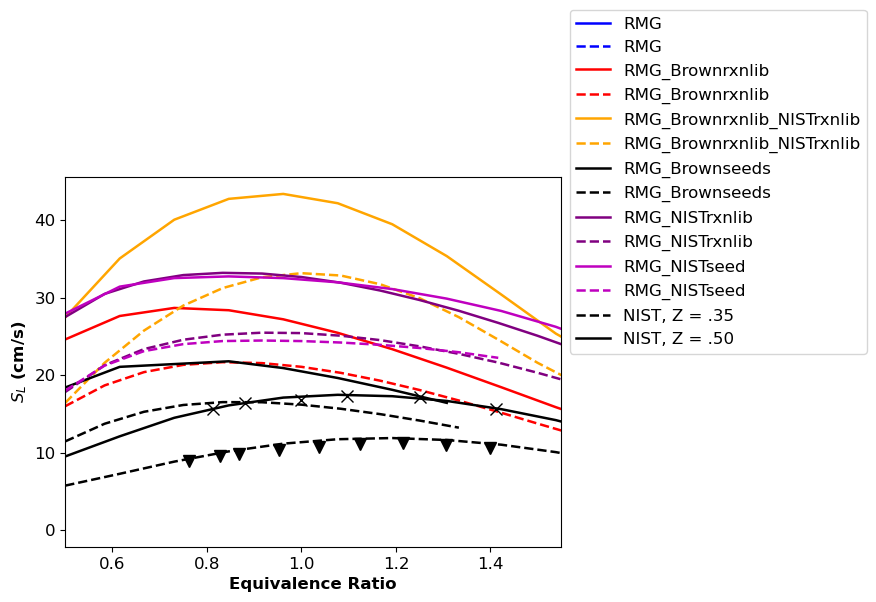

In [10]:

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 



_4fp_path = '/work/westgroup/nora/Code/projects/PFAS/ESSCI/models/RMG/4FP/'

folder_names = [x for x in os.listdir(_4fp_path) if '.ipynb' not in x]
colors = ['b','r','orange','black','purple','m']
# folder_names = ["RMG"]
# colors=['darkgreen']

for folder_name,c in zip(folder_names,colors):
    phis_50 = []
    speeds_50 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_50/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_50/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_50.append(phi)
        speeds_50.append(velocity*100)
    ax1.plot(phis_50, speeds_50, '-', color=c,label=folder_name)
             
    phis_39 = []
    speeds_39 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_39/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_39/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_39.append(phi)
        speeds_39.append(velocity*100)
    ax1.plot(phis_39, speeds_39, '--', color=c,label=folder_name)

    
    
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='black', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'black', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,1.55)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')

#legend
# legend_elements = [Line2D([0], [0], color='grey', lw=3, label='Z = .39',  linestyle='--'),
#                    Line2D([0], [0], color='grey', lw=3, label='Z = .50', linestyle='-'),
#                    Patch(facecolor='r', label='previous RMG'), 
#                    Patch(facecolor='g', label='current RMG'),  
#                    Patch(facecolor='black', label='NIST'), 
#                   ]


#plt.legend(handles=legend_elements, fontsize=12,bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.legend(bbox_to_anchor=(1.0, 0.5))

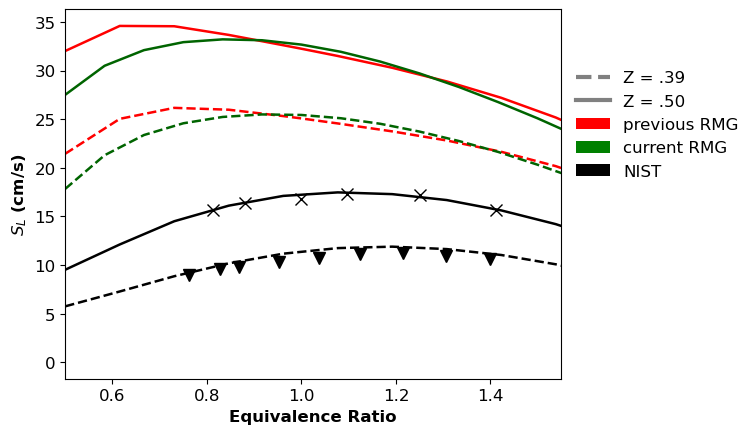

In [11]:

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 


#previous RMG model  #Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/
ax1.plot( sorted(_39_dict.keys()), sorted_39, '--', color = 'r', label='previous RMG')
ax1.plot(sorted(_50_dict.keys()), sorted_50, '-', color = 'r', label='previous RMG')   



_4fp_path = '/work/westgroup/nora/Code/projects/PFAS/ESSCI/models/RMG/4FP/'

#folder_names = [x for x in os.listdir(_4fp_path) if '.ipynb' not in x]
#colors = ['b','r','orange','black','purple','m']
folder_names = ["RMG_NISTrxnlib"]
colors=['darkgreen']

for folder_name,c in zip(folder_names,colors):
    phis_50 = []
    speeds_50 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_50/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_50/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_50.append(phi)
        speeds_50.append(velocity*100)
    ax1.plot(phis_50, speeds_50, '-', color=c,label=folder_name)
             
    phis_39 = []
    speeds_39 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_39/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_39/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_39.append(phi)
        speeds_39.append(velocity*100)
    ax1.plot(phis_39, speeds_39, '--', color=c,label=folder_name)

    
    
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='black', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'black', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,1.55)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')

#legend
legend_elements = [Line2D([0], [0], color='grey', lw=3, label='Z = .39',  linestyle='--'),
                   Line2D([0], [0], color='grey', lw=3, label='Z = .50', linestyle='-'),
                   Patch(facecolor='r', label='previous RMG'), 
                   Patch(facecolor='g', label='current RMG'),  
                   Patch(facecolor='black', label='NIST'), 
                  ]


plt.legend(handles=legend_elements, fontsize=12,bbox_to_anchor=(1.0, 0.5), frameon=False)


findfont: Font family ['STIX'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIX'] not found. Falling back to DejaVu Sans.


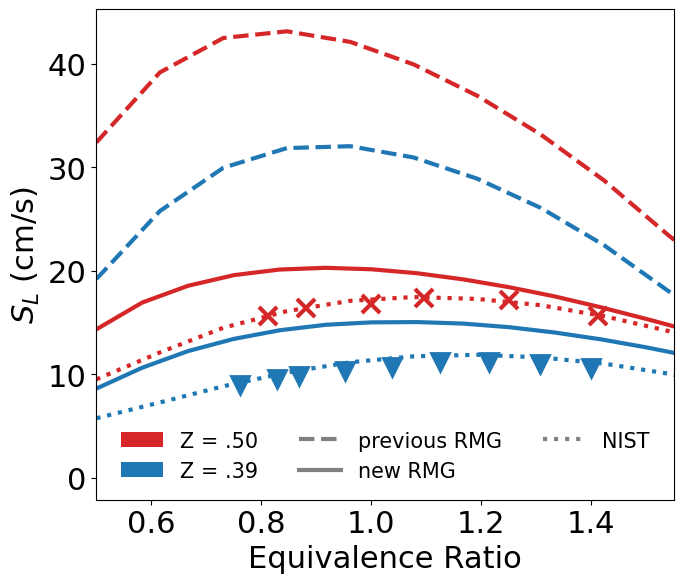

In [12]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (7,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'STIX'


#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 


#previous RMG model  #Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/
ax1.plot(phis_39_Fluorine_lib, speeds_39_Fluorine_lib, '--', color = 'tab:blue', linewidth=3, label='previous RMG')
ax1.plot(phis_50_Fluorine_lib, speeds_50_Fluorine_lib, '--', color = 'tab:red', linewidth=3, label='previous RMG')   


speeds_39_Fluorine_lib

_4fp_path = '/work/westgroup/nora/Code/projects/PFAS/ESSCI/models/RMG/4FP/'

#folder_names = [x for x in os.listdir(_4fp_path) if '.ipynb' not in x]
#colors = ['b','r','orange','black','purple','m']
folder_names = ["RMG"]
colors=['darkgreen']

for folder_name,c in zip(folder_names,colors):
    phis_50 = []
    speeds_50 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_50/154/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_50/154/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_50.append(phi)
        speeds_50.append(velocity*100)
    ax1.plot(phis_50, speeds_50, '-', color='tab:red',  linewidth=3, label=folder_name)
             
    phis_39 = []
    speeds_39 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_39/154/') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_39/154/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_39.append(phi)
        speeds_39.append(velocity*100)
    ax1.plot(phis_39, speeds_39, '-', color='tab:blue',  linewidth=3, label=folder_name)

    
    
ax1.plot(NIST_phis_35, NIST_speeds_35, ':', color='tab:blue', linewidth=3, label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, ':', color = 'tab:red', linewidth=3, label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=13, mew=2, c='tab:blue')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=13, mew=3, c='tab:red')
plt.xlabel('Equivalence Ratio')
plt.ylabel(r'$S_{L}$ (cm/s)')
plt.xlim(0.5,1.55)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')

#legend
legend_elements = [Patch(facecolor='tab:red', label='Z = .50'),  
                   Patch(facecolor='tab:blue', label='Z = .39'),
                   Line2D([0], [0], color='grey', lw=3, label='previous RMG',  linestyle='--'),
                   Line2D([0], [0], color='grey', lw=3, label='new RMG', linestyle='-'),
                   Line2D([0], [0], color='grey', lw=3, label='NIST', linestyle=':'),
                  ]


plt.legend(handles=legend_elements, fontsize=15, loc='lower center', frameon=False, ncol=3) #bbox_to_anchor=(1.0, 0.5),


[]

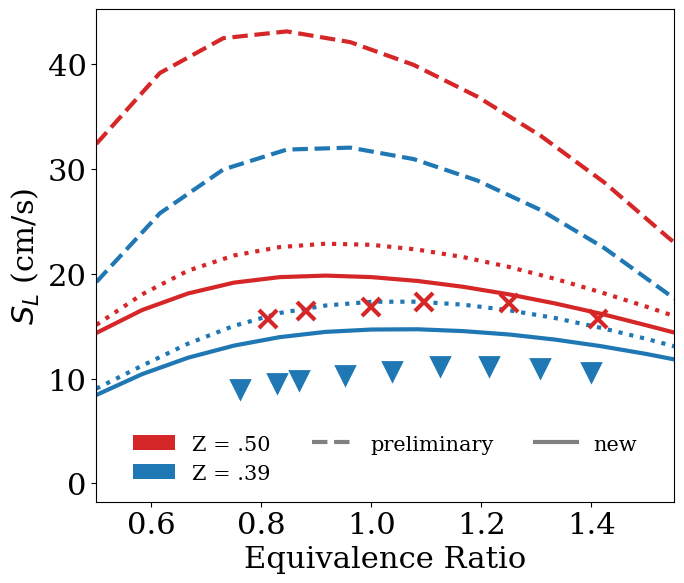

In [16]:
#PLOTTING SECTION
plt.rcParams['figure.figsize'] = (7,6)
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.family'] = 'serif'


#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 


#previous RMG model  #Advanced_Kinetics_Class/project/models/RMG/Fluorine_lib/
ax1.plot(phis_39_Fluorine_lib, speeds_39_Fluorine_lib, '--', color = 'tab:blue', linewidth=3, label='previous RMG')
ax1.plot(phis_50_Fluorine_lib, speeds_50_Fluorine_lib, '--', color = 'tab:red', linewidth=3, label='previous RMG')   


speeds_39_Fluorine_lib

_4fp_path = '/work/westgroup/nora/Code/projects/PFAS/ESSCI/models/RMG/4FP/'

#folder_names = [x for x in os.listdir(_4fp_path) if '.ipynb' not in x]
#colors = ['b','r','orange','black','purple','m']
folder_names = ["RMG"]
colors=['darkgreen']

spec_num = '155'
for folder_name,c in zip(folder_names,colors):
    phis_50 = []
    speeds_50 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_50/{spec_num}') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_50/{spec_num}/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_50.append(phi)
        speeds_50.append(velocity*100)
    ax1.plot(phis_50, speeds_50, '-', color='tab:red',  linewidth=3, label=folder_name)
             
    phis_39 = []
    speeds_39 = []
    csv_files=[x for x in os.listdir(f'{_4fp_path}/{folder_name}/data_39/{spec_num}') if '.csv' in x]
    for file in csv_files: 
        df = pd.read_csv(f'{_4fp_path}/{folder_name}/data_39/{spec_num}/{file}')
        phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
        velocity = df['velocity'][0]
        phis_39.append(phi)
        speeds_39.append(velocity*100)
    ax1.plot(phis_39, speeds_39, '-', color='tab:blue',  linewidth=3, label=folder_name)

    
    
#ax1.plot(NIST_phis_35, NIST_speeds_35, ':', color='tab:blue', linewidth=3, label='NIST, Z = .35')
#ax1.plot(NIST_phis_50, NIST_speeds_50, ':', color = 'tab:red', linewidth=3, label='NIST, Z = .50')

#after essci
ax1.plot(after_essci_phis_162_39, after_essci_speeds_162_39, ':', color='tab:blue', linewidth=3, label='after essci, .39')
ax1.plot(after_essci_phis_162_50, after_essci_speeds_162_50, ':', color='tab:red', linewidth=3, label='after essci, .50')


ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=13, mew=2, c='tab:blue')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=13, mew=3, c='tab:red')
plt.xlabel('Equivalence Ratio')
plt.ylabel(r'$S_{L}$ (cm/s)')
plt.xlim(0.5,1.55)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')

#legend
legend_elements = [Patch(facecolor='tab:red', label='Z = .50'),  
                   Patch(facecolor='tab:blue', label='Z = .39'),
                   Line2D([0], [0], color='grey', lw=3, label='preliminary',  linestyle='--'),
                   Line2D([0], [0], color='grey', lw=3, label='new', linestyle='-'),
                   # Line2D([0], [0], color='grey', lw=3, label='NIST', linestyle=':'),
                  ]


plt.legend(handles=legend_elements, fontsize=15, loc='lower center', frameon=False, ncol=3) #bbox_to_anchor=(1.0, 0.5),
#155

In [15]:
#after essci, 39
after_essci_phis_162_39 = [0.5,0.5833333333333333,0.6666666666666666,0.7500000000000001,0.8333333333333334,0.9166666666666667,1.0,1.0833333333333333,1.1666666666666665,1.25,1.3333333333333333,1.4166666666666665,1.5000000000000002,1.5833333333333333,1.6666666666666667,1.7499999999999998,1.8333333333333335,1.9166666666666665,2.0,2.083333333333333,2.1666666666666665,2.2499999999999996,2.333333333333333,2.416666666666666,2.5]
after_essci_speeds_162_39 = np.array([0.09039661258479616,0.11229788770034689,0.1333358482154109,0.1503038797023098,0.16258775196829253,0.16974562812124916,0.173302077131505,0.17340569659023308,0.17057513103708968,0.16521353921148677,0.15784388040181496,0.14844899700042274,0.13784893434922452,0.12620225322942313,0.1142274948214638,0.10319828168817231,0.0927017938155707,0.08314395102219549,0.07442208098096094,0.06648988547199727,0.05893992771748872,0.052223766046251216,0.04616825823617769,0.04075104693046591,0.03627880991224777])*100

after_essci_phis_162_50 = [0.5,0.5833333333333333,0.6666666666666666,0.7500000000000001,0.8333333333333334,0.9166666666666667,1.0,1.0833333333333333,1.1666666666666665,1.25,1.3333333333333333,1.4166666666666665,1.5000000000000002,1.5833333333333333,1.6666666666666667,1.7499999999999998,1.8333333333333335,1.9166666666666665,2.0,2.083333333333333,2.1666666666666665,2.2499999999999996,2.333333333333333,2.416666666666666,2.5]
after_essci_speeds_162_50 = np.array([0.15125776239731775,0.18046260918100224,0.20305288509939243,0.2175300976593275,0.22554835491871655,0.22880673712804872,0.22771778864514655,0.22317591362833492,0.21600633925940496,0.20660400698887738,0.19530002522650433,0.1824741373518206,0.16861545070436101,0.15384672573099034,0.13889165725531166,0.12432331732249657,0.11131459742693957,0.0989634042400624,0.08844270969200173,0.07905569346191298,0.070467760501879,0.06264828562794425,0.055616095927099825,0.049274284707230595,0.0434664680478221])*100

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


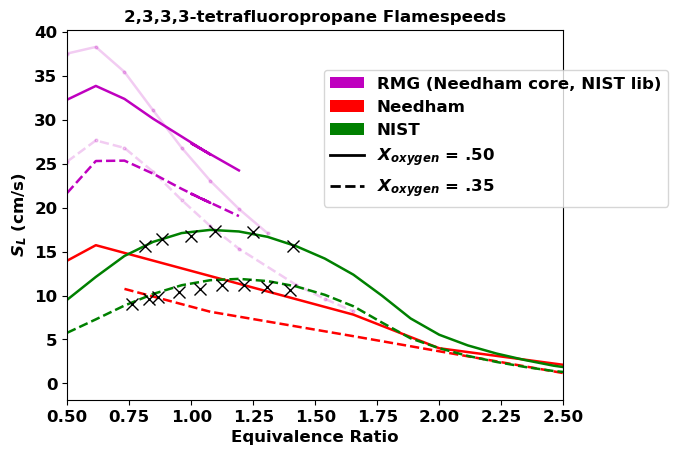

In [5]:


#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 

# ax1.plot(phis_39_Needham_core_NIST_kt_F_lib , speeds_39_Needham_core_NIST_kt_F_lib, '*', color='gray',label='RMG: (Needham core, NIST lib & thermo) & F lib, Z = .35')
# ax1.plot(phis_50_Needham_core_NIST_kt_F_lib , speeds_50_Needham_core_NIST_kt_F_lib, '*', color='gray',label='RMG:Needham core, NIST lib & thermo F lib, Z = .50')


ax1.plot(phis_39_Needham_core_NIST_F_lib , speeds_39_Needham_core_NIST_F_lib, '--', color='m',label='RMG: (Needham core, NIST lib) & F lib, Z = .35')
ax1.plot(phis_50_Needham_core_NIST_F_lib , speeds_50_Needham_core_NIST_F_lib, '-', color='m',label='RMG:Needham core, NIST & F lib, Z = .50')


ax1.plot(phis_39_Needham_core , speeds_39_Needham_core, '--o', color='m', markersize=2, label='RMG (Needham core)', alpha=0.2)#, Z = .35')
ax1.plot(phis_50_Needham_core , speeds_50_Needham_core, '-o', color='m', markersize=2, alpha=0.2) #label='RMG:Needham core, Z = .50')

# ax1.plot(phis_39_Needham_core_Fluorine_lib , speeds_39_Needham_core_Fluorine_lib, '--', color='m',label='RMG:Needham core, F lib, Z = .50')
# ax1.plot(phis_50_Needham_core_Fluorine_lib , speeds_50_Needham_core_Fluorine_lib, '-', color='m',label='RMG:Needham core, F lib, Z = .50')

# ax1.plot(phis_39_Fluorine_lib , speeds_39_Fluorine_lib, '--', color='tab:blue')#,label='RMG')
# ax1.plot(phis_50_Fluorine_lib , speeds_50_Fluorine_lib, '-', color='tab:blue')#,label='RMG:Needham core, F lib, Z = .50')


ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .35')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'x', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')

custom_lines = [#Patch(facecolor='tab:blue'),
                Patch(facecolor='m'),
                Patch(facecolor='r'),
                Patch(facecolor='g'),
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2)]


plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['RMG (Needham core, NIST lib)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))

#no change in between Needham core and Needham core Fluorine lib

# RMG model: NIST core

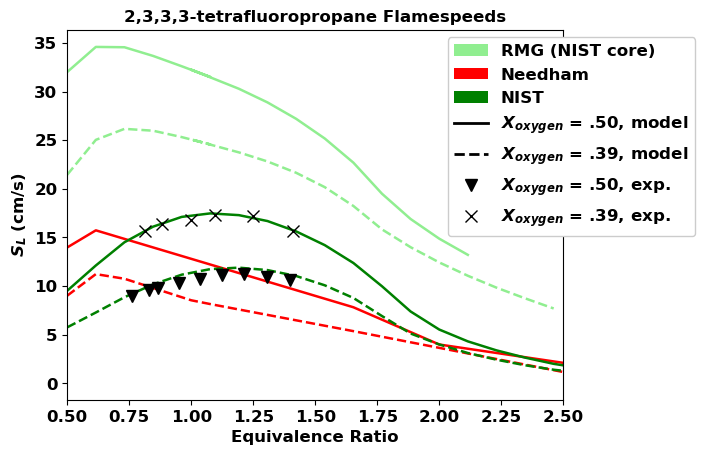

In [26]:
#Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_50') if '.csv' in x]
phis_50_RMG_NIST_core = []
speeds_50_RMG_NIST_core = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_RMG_NIST_core.append(phi)
    speeds_50_RMG_NIST_core.append(velocity*100)

    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39') if '.csv' in x]
phis_39_RMG_NIST_core = []
speeds_39_RMG_NIST_core = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_RMG_NIST_core.append(phi)
    speeds_39_RMG_NIST_core.append(velocity*100)
    
    
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

ax1.plot(phis_39_RMG_NIST_core, speeds_39_RMG_NIST_core, '--', color='lightgreen', label='RMG model: NIST core, Z = .39')
ax1.plot(phis_50_RMG_NIST_core, speeds_50_RMG_NIST_core, '-', color = 'lightgreen', label='RMG model: NIST core, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')

custom_lines = [#Patch(facecolor='tab:blue'),
                Patch(facecolor='lightgreen'),
                Patch(facecolor='r'),
                Patch(facecolor='g'),
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2),
                Line2D([0], [0], marker='v',markersize=8, color='black', lw=0),
                Line2D([0], [0], marker='x', markersize=8, color='black', lw=0)]


plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['RMG (NIST core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.75, 0.42), framealpha=1)


In [30]:
x = range(161,186)
s=""
count=0
for i in x:
    s+=f"'copy_chem0{i}.cti' "
    count+=1
print(s)

'copy_chem0161.cti' 'copy_chem0162.cti' 'copy_chem0163.cti' 'copy_chem0164.cti' 'copy_chem0165.cti' 'copy_chem0166.cti' 'copy_chem0167.cti' 'copy_chem0168.cti' 'copy_chem0169.cti' 'copy_chem0170.cti' 'copy_chem0171.cti' 'copy_chem0172.cti' 'copy_chem0173.cti' 'copy_chem0174.cti' 'copy_chem0175.cti' 'copy_chem0176.cti' 'copy_chem0177.cti' 'copy_chem0178.cti' 'copy_chem0179.cti' 'copy_chem0180.cti' 'copy_chem0181.cti' 'copy_chem0182.cti' 'copy_chem0183.cti' 'copy_chem0184.cti' 'copy_chem0185.cti' 


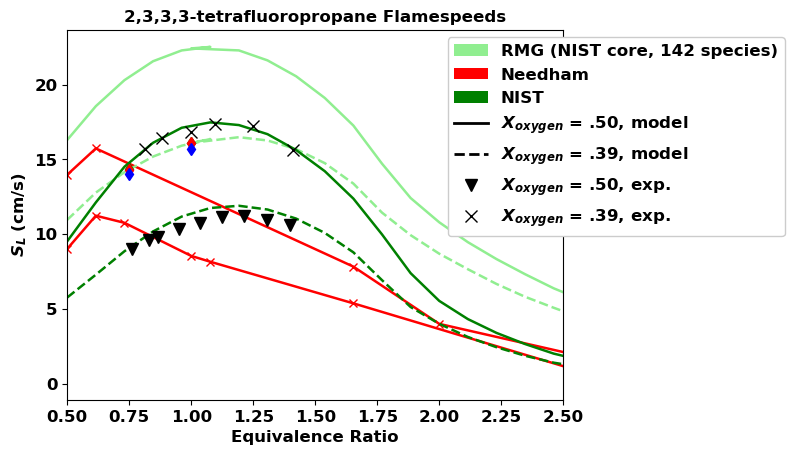

In [27]:
#Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/editing_mechanism/golden_rxn/data_39 #142 species 
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/editing_mechanism/golden_rxn/data_50') if '_copy_chem0142.cti.csv' in x]
phis_50_RMG_NIST_core_gr = []
speeds_50_RMG_NIST_core_gr = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/editing_mechanism/golden_rxn/data_50/{file}')
    if 'stoic' in file:
        file='1.0_copy_chem0142.cti.csv'
    phi = float(re.search('([0-9]\.[0-9]+)_copy_chem0142\.cti\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_RMG_NIST_core_gr.append(phi)
    speeds_50_RMG_NIST_core_gr.append(velocity*100)

    
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/editing_mechanism/golden_rxn/data_39') if '_copy_chem0142.cti.csv' in x]
phis_39_RMG_NIST_core_gr = []
speeds_39_RMG_NIST_core_gr = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/RMG/NIST_core_NIST_thermo/editing_mechanism/golden_rxn/data_39/{file}')
    if 'stoic' in file:
        file='1.0_copy_chem0142.cti.csv'
    phi = float(re.search('([0-9]\.[0-9]+)_copy_chem0142\.cti\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_RMG_NIST_core_gr.append(phi)
    speeds_39_RMG_NIST_core_gr.append(velocity*100)

    
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '-x', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-x', color='r', label='Needham, Z = .50')

ax1.plot(phis_39_RMG_NIST_core_gr, speeds_39_RMG_NIST_core_gr, '--', color='lightgreen', label='RMG model: NIST core, Z = .39')
ax1.plot(phis_50_RMG_NIST_core_gr, speeds_50_RMG_NIST_core_gr, '-', color = 'lightgreen', label='RMG model: NIST core, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')

custom_lines = [#Patch(facecolor='tab:blue'),
                Patch(facecolor='lightgreen'),
                Patch(facecolor='r'),
                Patch(facecolor='g'),
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2),
                Line2D([0], [0], marker='v',markersize=8, color='black', lw=0),
                Line2D([0], [0], marker='x', markersize=8, color='black', lw=0)]


ax1.plot(.75, 100*0.14327464573652618, 'd', color='g')
ax1.plot(1, 100*0.1610065864760595, 'd', color='g')
ax1.plot(.75, 100*0.14314190583297823, 'd', color='r')
ax1.plot(1, 100*0.16070049792583369, 'd', color='r')
ax1.plot(.75, 100*0.140185175556037, 'd', color='b')
ax1.plot(1, 100*0.1572691824171979, 'd', color='b')


plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['RMG (NIST core, 142 species)', 'Needham', 'NIST', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.75, 0.42), framealpha=1)


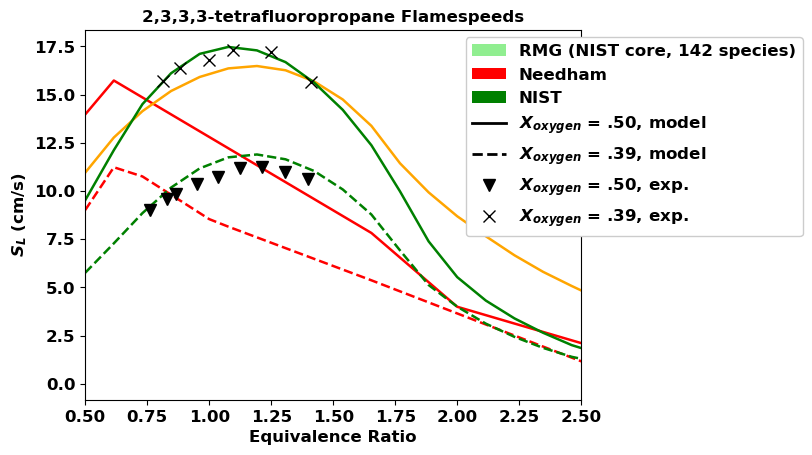

In [28]:
#comparing 142, 143, 144 species in RMG: NIST core rxn 

#142, 39
phis_142 = [0.5, 0.6153846153846154, 0.7307692307692307, 0.8461538461538461, 0.9615384615384616, 1.0769230769230769, 1.1923076923076923, 1.3076923076923077, 1.423076923076923, 1.5384615384615385, 1.653846153846154, 1.769230769230769, 1.8846153846153846, 2.0, 2.1153846153846154, 2.2307692307692304, 2.346153846153846, 2.4615384615384617, 2.576923076923077, 2.692307692307692, 2.8076923076923075, 2.923076923076923, 3.038461538461538, 3.1538461538461537, 3.269230769230769, 3.3846153846153846, 3.5, 3.615384615384615, 3.730769230769231, 3.8461538461538463, 3.9615384615384612, 4.076923076923077, 4.1923076923076925, 4.3076923076923075, 4.423076923076923, 4.538461538461538, 4.653846153846153, 4.769230769230769]
fs_142 = [0.10952841477602195, 0.12775146992185382, 0.1414429030597896, 0.151877350908542, 0.15916122685776196, 0.16361115019214933, 0.1648406422484819, 0.16262647555450765, 0.15685858161097596, 0.14747473828044838, 0.13379390131108762, 0.11437705783995188, 0.09929816904095791, 0.08688800510526824, 0.07651148974229596, 0.0666484783273782, 0.05806025620514674, 0.05071907956892343, 0.043734883949904976, 0.03752619570943198, 0.03195516966760263, 0.02712362054602348, 0.023264776256974744, 0.019761085770261845, 0.016846015518777797, 0.014349040510232239, 0.01244649522855739, 0.010861838329966607, 0.009499845152206652, 0.008539093315533128, 0.007600779462399823, 0.006807608528449135, 0.006143713518923754, 0.005623322226854038, 0.005078621885039049, 0.004648625561211006, 0.00426736788249388, 0.003943835602305264]

#143, 39
phis_143 =[0.5, 0.6153846153846154, 0.7307692307692307, 0.8461538461538461, 0.9615384615384616, 1.0769230769230769, 1.1923076923076923, 1.3076923076923077, 1.423076923076923, 1.5384615384615385, 1.653846153846154, 1.769230769230769, 1.8846153846153846, 2.0, 2.1153846153846154, 2.2307692307692304, 2.346153846153846, 2.4615384615384617, 2.576923076923077, 2.692307692307692, 2.8076923076923075, 2.923076923076923, 3.038461538461538, 3.1538461538461537, 3.269230769230769, 3.3846153846153846, 3.5, 3.615384615384615, 3.730769230769231, 3.8461538461538463, 3.9615384615384612, 4.076923076923077, 4.1923076923076925, 4.3076923076923075, 4.423076923076923, 4.538461538461538, 4.653846153846153, 4.769230769230769]
fs_143 = [0.10952841477602195, 0.12775146992185382, 0.1414429030597896, 0.151877350908542, 0.15916122685776196, 0.16361115019214933, 0.1648406422484819, 0.16262647555450765, 0.15685858161097596, 0.14747473828044838, 0.13379390131108762, 0.11437705783995188, 0.09929816904095791, 0.08688800510526824, 0.07651148974229596, 0.0666484783273782, 0.05806025620514674, 0.05071907956892343, 0.043734883949904976, 0.03752619570943198, 0.03195516966760263, 0.02712362054602348, 0.023264776256974744, 0.019761085770261845, 0.016846015518777797, 0.014349040510232239, 0.01244649522855739, 0.010861838329966607, 0.009499845152206652, 0.008539093315533128, 0.007600779462399823, 0.006807608528449135, 0.006143713518923754, 0.005623322226854038, 0.005078621885039049, 0.004648625561211006, 0.00426736788249388, 0.003943835602305264]

#144 rxns , 39 (golden rxn added in) 
phis_144 =[0.5, 0.6153846153846154, 0.7307692307692307, 0.8461538461538461, 0.9615384615384616, 1.0769230769230769, 1.1923076923076923, 1.3076923076923077, 1.423076923076923, 1.5384615384615385, 1.653846153846154, 1.769230769230769, 1.8846153846153846, 2.0, 2.1153846153846154, 2.2307692307692304, 2.346153846153846, 2.4615384615384617, 2.576923076923077, 2.692307692307692, 2.8076923076923075, 2.923076923076923, 3.038461538461538, 3.1538461538461537, 3.269230769230769, 3.3846153846153846, 3.5, 3.615384615384615, 3.730769230769231, 3.8461538461538463, 3.9615384615384612, 4.076923076923077, 4.1923076923076925, 4.3076923076923075, 4.423076923076923, 4.538461538461538, 4.653846153846153, 4.769230769230769]
fs_144 = [0.10952841462994917, 0.12775146990078717, 0.14142682789193378, 0.151877243387989, 0.15916123009499591, 0.1636110931083304, 0.16484627024459522, 0.1626391065864649, 0.1568593970698807, 0.14747475375870966, 0.13379398193048175, 0.11437705713227508, 0.09929816904088913, 0.08688800509622348, 0.07651148974217782, 0.06664837780548671, 0.058060256203820645, 0.0507190795706564, 0.04373488392189529, 0.03752619568321677, 0.03195516964748249, 0.02712324112190775, 0.023264776588123447, 0.01976108721028164, 0.01684601555150864, 0.0143490586096971, 0.012446495215182103, 0.010861838324198052, 0.00949984514351586, 0.008539092821752482, 0.007600779494464486, 0.006807608528511384, 0.006143713646099198, 0.005623459093679261, 0.005078622070514711, 0.004648576885445864, 0.004267337931433007, 0.003943835664751987]

fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#142
#ax1.plot(phis_142, np.array(fs_142)*100, '-', color='lightgreen',label='142 species')
#ax1.plot(phis_143, np.array(fs_143)*100, '-', color='gray',label='143 species')
ax1.plot(phis_144, np.array(fs_144)*100, '-', color='orange',label='144 species')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')

custom_lines = [#Patch(facecolor='tab:blue'),
                Patch(facecolor='lightgreen'),
                Patch(facecolor='r'),
                Patch(facecolor='g'),
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2),
                Line2D([0], [0], marker='v',markersize=8, color='black', lw=0),
                Line2D([0], [0], marker='x', markersize=8, color='black', lw=0)]


plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['RMG (NIST core, 142 species)', 'Needham', 'NIST', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.75, 0.42), framealpha=1)


# 6th most sens NIST rxn 

<function matplotlib.pyplot.legend(*args, **kwargs)>

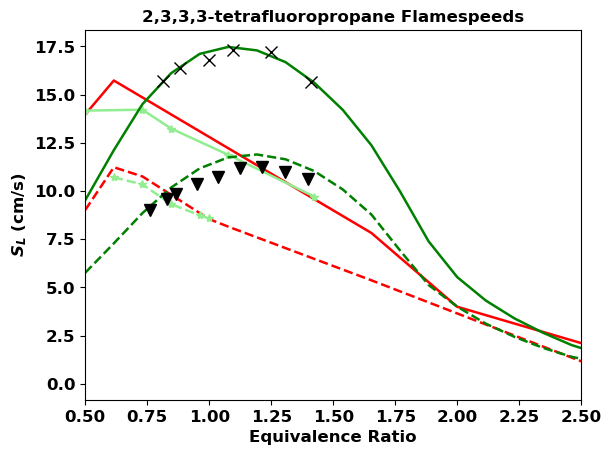

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#6th most sens rxn 
#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/6th_most_sens_NIST_rxn/data_39/') if '.csv' in x]
phis_39_6th_most_sens = []
speeds_39_6th_most_sens = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/6th_most_sens_NIST_rxn/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_6th_most_sens.append(phi)
    speeds_39_6th_most_sens.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/6th_most_sens_NIST_rxn/data_50/') if '.csv' in x]
phis_50_6th_most_sens = []
speeds_50_6th_most_sens = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/6th_most_sens_NIST_rxn/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_6th_most_sens.append(phi)
    speeds_50_6th_most_sens.append(velocity*100)




ax1.plot(phis_39_6th_most_sens, speeds_39_6th_most_sens, '--*', color='lightgreen',label='6th most sens rxn, 39')
ax1.plot(phis_50_6th_most_sens, speeds_50_6th_most_sens, '-*', color='lightgreen',label='6th most sens rxn, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

## CH2CF2 rxns swapped

<function matplotlib.pyplot.legend(*args, **kwargs)>

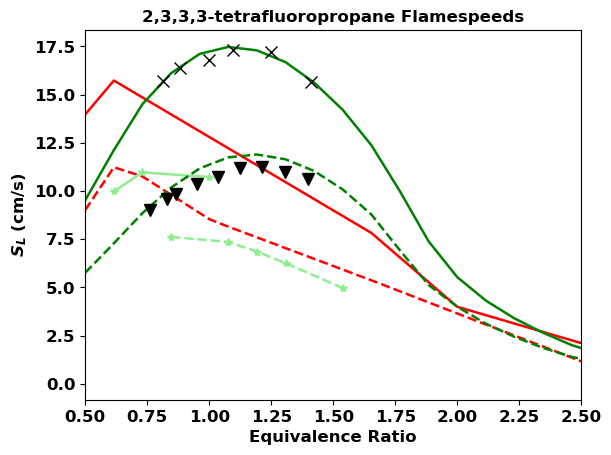

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#6th most sens rxn 
#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2CF2_rxns_swapped/data_39/') if '.csv' in x]
phis_39_rxns_swapped = []
speeds_39_rxns_swapped = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2CF2_rxns_swapped/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_rxns_swapped.append(phi)
    speeds_39_rxns_swapped.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2CF2_rxns_swapped/data_50/') if '.csv' in x]
phis_50_rxns_swapped = []
speeds_50_rxns_swapped = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2CF2_rxns_swapped/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_rxns_swapped.append(phi)
    speeds_50_rxns_swapped.append(velocity*100)




ax1.plot(phis_39_rxns_swapped, speeds_39_rxns_swapped, '--*', color='lightgreen',label='rxn_swapped, 39')
ax1.plot(phis_50_rxns_swapped, speeds_50_rxns_swapped, '-*', color='lightgreen',label='rxns_swapped, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

## CH2COFCF3 swap kinetics thermo

<function matplotlib.pyplot.legend(*args, **kwargs)>

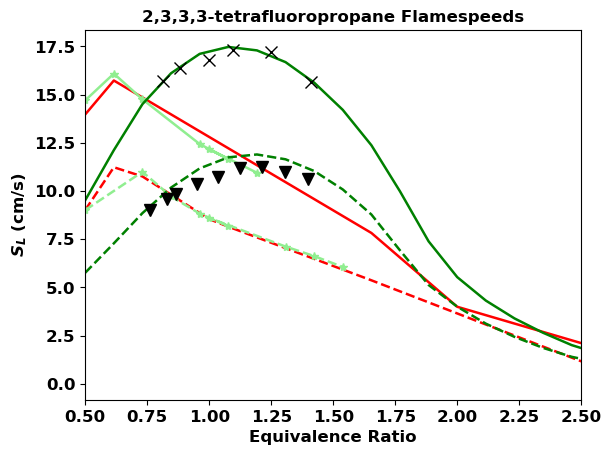

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_swap_kinetics_thermo/data_39/') if '.csv' in x]
phis_39_CH2COFCF3_swap_kinetics_thermo = []
speeds_39_CH2COFCF3_swap_kinetics_thermo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_swap_kinetics_thermo/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_CH2COFCF3_swap_kinetics_thermo.append(phi)
    speeds_39_CH2COFCF3_swap_kinetics_thermo.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_swap_kinetics_thermo/data_50/') if '.csv' in x]
phis_50_CH2COFCF3_swap_kinetics_thermo = []
speeds_50_CH2COFCF3_swap_kinetics_thermo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_swap_kinetics_thermo/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_CH2COFCF3_swap_kinetics_thermo.append(phi)
    speeds_50_CH2COFCF3_swap_kinetics_thermo.append(velocity*100)




ax1.plot(phis_39_CH2COFCF3_swap_kinetics_thermo, speeds_39_CH2COFCF3_swap_kinetics_thermo, '--*', color='lightgreen',label='CH2COFCF3_swap_kinetics_thermo, 39')
ax1.plot(phis_50_CH2COFCF3_swap_kinetics_thermo, speeds_50_CH2COFCF3_swap_kinetics_thermo, '-*', color='lightgreen',label='CH2COFCF3_swap_kinetics_thermo, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

# CH2COFCF3 delete

<function matplotlib.pyplot.legend(*args, **kwargs)>

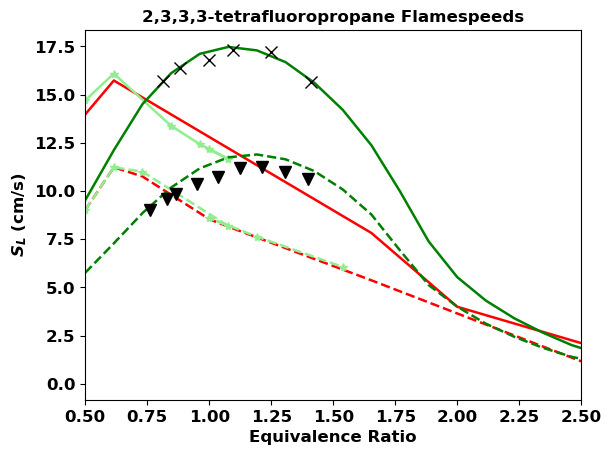

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_delete/data_39/') if '.csv' in x]
phis_39_CH2COFCF3_delete = []
speeds_39_CH2COFCF3_delete = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_delete/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_CH2COFCF3_delete.append(phi)
    speeds_39_CH2COFCF3_delete.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_delete/data_50/') if '.csv' in x]
phis_50_CH2COFCF3_delete= []
speeds_50_CH2COFCF3_delete = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/CH2COFCF3_delete/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_CH2COFCF3_delete.append(phi)
    speeds_50_CH2COFCF3_delete.append(velocity*100)




ax1.plot(phis_39_CH2COFCF3_delete, speeds_39_CH2COFCF3_delete, '--*', color='lightgreen',label='CH2COFCF3_delete, 39')
ax1.plot(phis_50_CH2COFCF3_delete, speeds_50_CH2COFCF3_delete, '-*', color='lightgreen',label='CH2COFCF3_delete, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

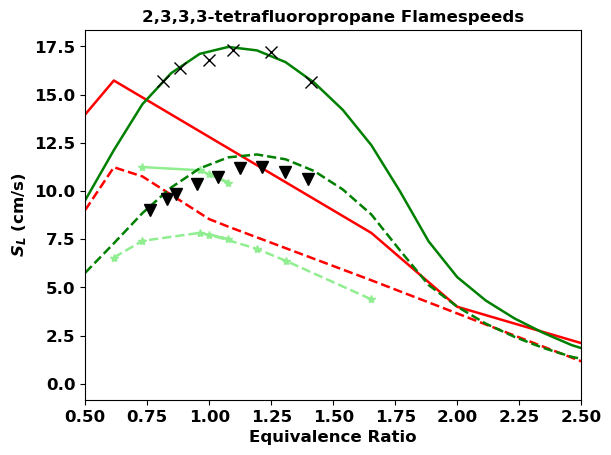

In [33]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_39/') if '.csv' in x]
phis_39_all_combination = []
speeds_39_all_combination = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_all_combination.append(phi)
    speeds_39_all_combination.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_50/') if '.csv' in x]
phis_50_all_combination= []
speeds_50_all_combination = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_all_combination.append(phi)
    speeds_50_all_combination.append(velocity*100)




ax1.plot(phis_39_all_combination, speeds_39_all_combination, '--*', color='lightgreen',label='allcombo, 39')
ax1.plot(phis_50_all_combination, speeds_50_all_combination, '-*', color='lightgreen',label='allcombo, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

In [ ]:
#combination rxns swapped, 6th most sense

<function matplotlib.pyplot.legend(*args, **kwargs)>

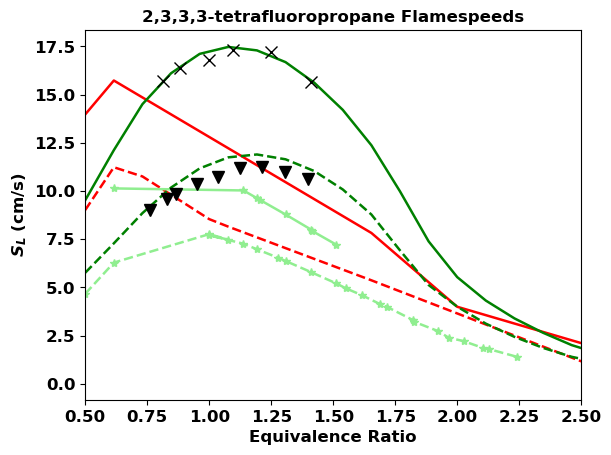

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sense/data_39/') if '.csv' in x]
phis_39_combo = []
speeds_39_combo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sense/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_combo.append(phi)
    speeds_39_combo.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sense/data_50/') if '.csv' in x]
phis_50_combo= []
speeds_50_combo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sense/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_combo.append(phi)
    speeds_50_combo.append(velocity*100)




ax1.plot(phis_39_combo, speeds_39_combo, '--*', color='lightgreen',label='combo, 39')
ax1.plot(phis_50_combo, speeds_50_combo, '-*', color='lightgreen',label='combo, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

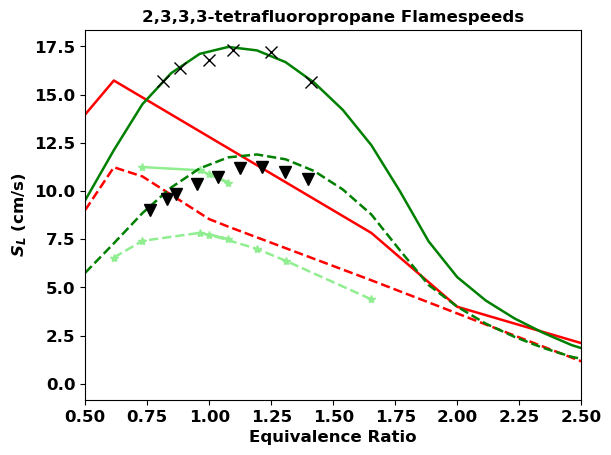

In [35]:

#all combo including delete Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_39/0.7307692307692307.csv
fig = plt.figure()
ax1 = fig.add_subplot(111) 
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r',label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', label='Needham, Z = .50')

#39
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_39/') if '.csv' in x]
phis_39_all_combo = []
speeds_39_all_combo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_39/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_39_all_combo.append(phi)
    speeds_39_all_combo.append(velocity*100)

#50
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_50/') if '.csv' in x]
phis_50_all_combo= []
speeds_50_all_combo = []
for file in csv_files: 
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/editing_mechanism/combination_rxns_swapped_6th_most_sens_CH2COCF3_delete/data_50/{file}')
    if 'stoic' in file:
        file='1.0.csv'
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    velocity = df['velocity'][0]
    phis_50_all_combo.append(phi)
    speeds_50_all_combo.append(velocity*100)




ax1.plot(phis_39_all_combo, speeds_39_all_combo, '--*', color='lightgreen',label='combo, 39')
ax1.plot(phis_50_all_combo, speeds_50_all_combo, '-*', color='lightgreen',label='combo, 50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='g', label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'g', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=8, c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=8, c='black')
plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.xlim(0.5,2.5)
plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
plt.legend

# Needham model (recalculated)

In [36]:
dictionary_phis_39 = {}

for phi, speed in zip(phis_39_all_combo, speeds_39_all_combo):
    dictionary_phis_39[phi] = speed

for phi, speed in zip(phis_39_combo, speeds_39_combo): 
    if phi not in dictionary_phis_39.keys():
        dictionary_phis_39[phi] = speed
    

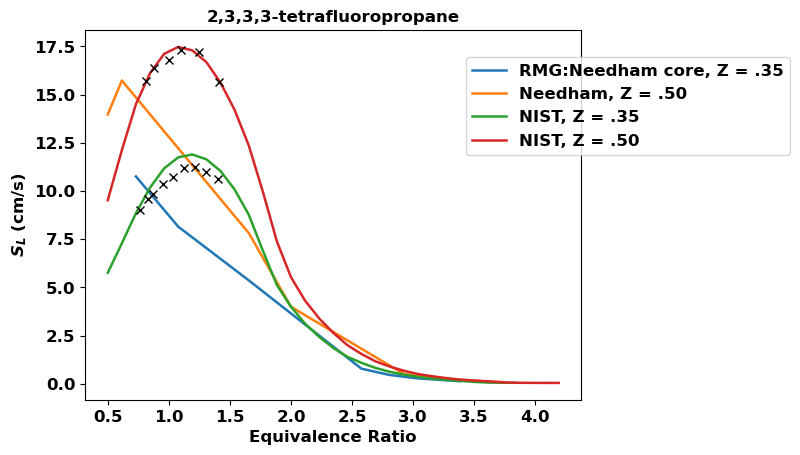

In [20]:
csv_files = [x for x in os.listdir('/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/flamespeeds/data_39/') if '.csv' in x]
phis_39_Needham_model_recalc = []
speeds_39_Needham_model_recalc = []
for file in csv_files: 
    if 'stoic' in file:
        continue
    phi = float(re.search('([0-9]\.[0-9]+)\.csv',file).group(1))
    df = pd.read_csv(f'/work/westgroup/nora/Code/Advanced_Kinetics_Class/project/models/Needham_model/flamespeeds/data_39/{file}')
    velocity = df['velocity'][0]
    phis_39_Needham_model_recalc.append(phi)
    speeds_39_Needham_model_recalc.append(velocity*100)

#plotting
fig = plt.figure()
ax1 = fig.add_subplot(111) 

ax1.plot(phis_39_Needham_model_recalc , speeds_39_Needham_model_recalc, '-', label='RMG:Needham core, Z = .35')
#ax1.plot(phis_50_Needham_core , speeds_50_Needham_core, '-', label='RMG:Needham core, Z = .50')

#ax1.plot(tetra_phis_35_percent, tetra_speeds_35_percent, '-', label='RMG original model, Z = .35')
#ax1.plot(tetra_phis_50_percent[:10], tetra_speeds_50_percent[:10], '-', label='Z = .50')
#ax1.plot(needham_phis_35, needham_speeds_35, '-', label='Needham, Z = .35')
ax1.plot(needham_phis_50, needham_speeds_50, '-', label='Needham, Z = .50')
ax1.plot(NIST_phis_35, NIST_speeds_35, '-', label='NIST, Z = .35')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', label='NIST, Z = .50')
ax1.plot(takashi_39_x, takashi_39_y, 'x', c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', c='black')



plt.xlabel('Equivalence Ratio',fontweight='bold')
plt.ylabel(r'$S_{L}$ (cm/s)',fontdict=fontdict)
plt.title('2,3,3,3-tetrafluoropropane', fontsize = 12, fontweight='bold')
ax1.legend(bbox_to_anchor=(0.75, 0.95))

#recalcs the same ! good : ) 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


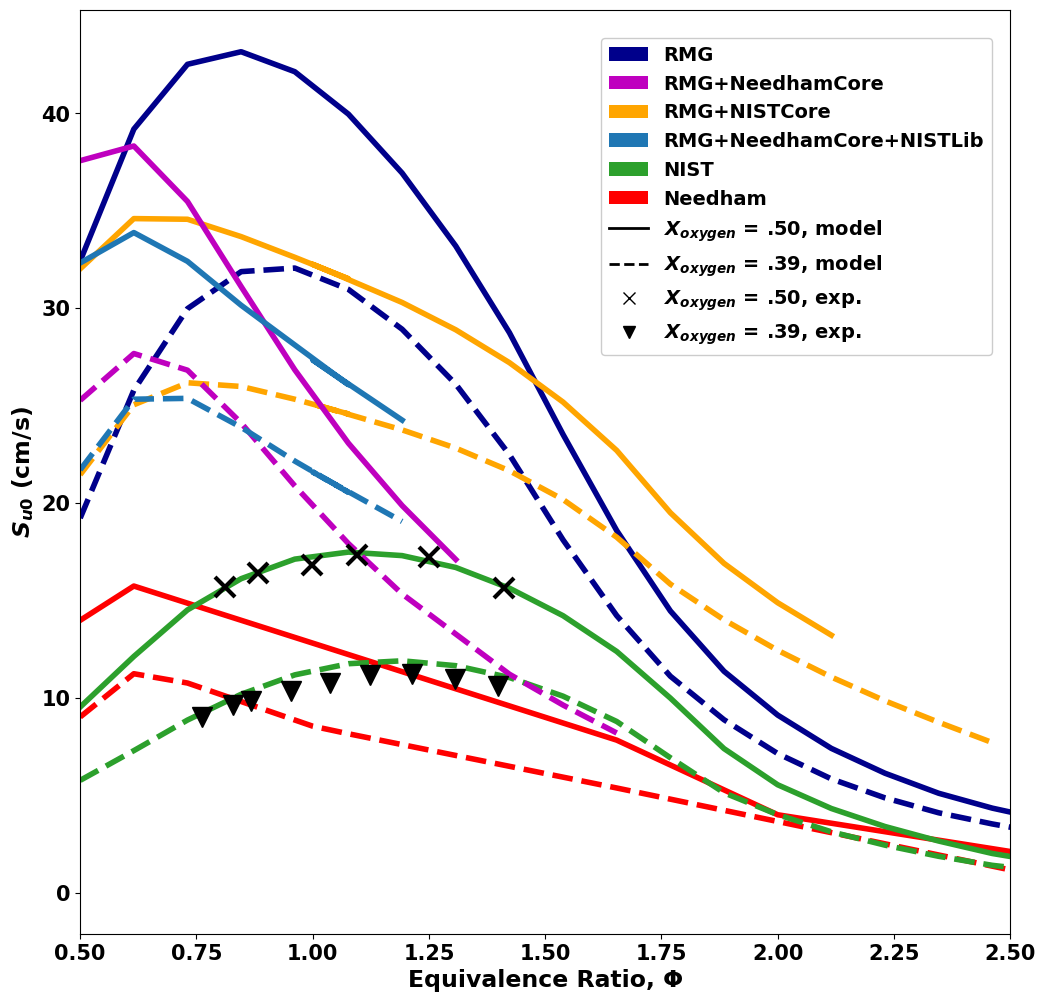

In [37]:
#final plot 


fig = plt.figure(figsize=[12,12])
ax1 = fig.add_subplot(111) 


ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r', linewidth = 4, label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', linewidth = 4, label='Needham, Z = .50')


ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='tab:green', linewidth = 4, label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'tab:green', linewidth = 4, label='NIST, Z = .50')

#RMG Fluorine 
ax1.plot(phis_39_Fluorine_lib , speeds_39_Fluorine_lib, '--', color='darkblue', linewidth = 4, label='RMG:Fluorine Lib, Z = .35')
ax1.plot(phis_50_Fluorine_lib , speeds_50_Fluorine_lib, '-',  color='darkblue', linewidth = 4, label='RMG:Fluorine Lib, Z = .50')

#RMG_NISTCore
ax1.plot(phis_39_RMG_NIST_core, speeds_39_RMG_NIST_core, '--', color='orange', linewidth = 4, label='RMG model: NIST core, Z = .39')
ax1.plot(phis_50_RMG_NIST_core, speeds_50_RMG_NIST_core, '-', color = 'orange', linewidth = 4, label='RMG model: NIST core, Z = .50')

#RMG_Needham_core
ax1.plot(phis_39_Needham_core , speeds_39_Needham_core, '--', linewidth = 4, color='m', markersize=2, label='RMG (Needham core)')#, Z = .35')
ax1.plot(phis_50_Needham_core , speeds_50_Needham_core, '-', linewidth = 4, color='m', markersize=2) #label='RMG:Needham core, Z = .50')


#RMG Needham core, NIST library
ax1.plot(phis_39_Needham_core_NIST_F_lib , speeds_39_Needham_core_NIST_F_lib,  '--', color='tab:blue', linewidth = 4, label='RMG: (Needham core, NIST lib) & F lib, Z = .35')
ax1.plot(phis_50_Needham_core_NIST_F_lib , speeds_50_Needham_core_NIST_F_lib,  '-', color='tab:blue', linewidth = 4, label='RMG:Needham core, NIST & F lib, Z = .50')




ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=14,  c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=14, mew=3, c='black')

custom_lines = [Patch(facecolor='darkblue'),
                Patch(facecolor='m'),
                Patch(facecolor='orange'),
                Patch(facecolor='tab:blue'),
                Patch(facecolor='tab:green'), 
                Patch(facecolor='r'), 
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2),
                Line2D([0], [0], marker='x',markersize=8, color='black', lw=0),
                Line2D([0], [0], marker='v', markersize=8, color='black', lw=0)]


plt.xlabel('Equivalence Ratio, \u03A6',fontweight='bold', fontsize=17)
plt.ylabel(r'$S_{u0}$ (cm/s)',fontweight='bold', fontsize=17)#fontdict=fontdict, 
plt.xlim(0.5,2.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['RMG', 'RMG+NeedhamCore', 'RMG+NISTCore', 'RMG+NeedhamCore+NISTLib', 'NIST', 'Needham', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.55, 0.98), framealpha=1, fontsize=14)


plt.savefig('final_models_plot.png')



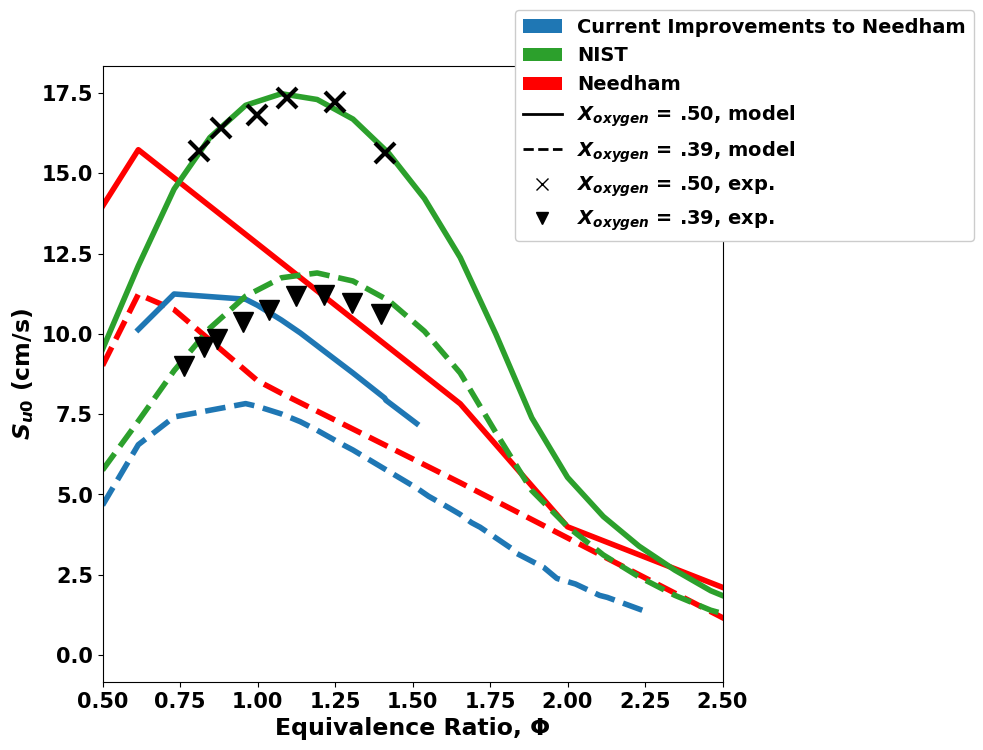

In [40]:
#editing Needham model 

fig = plt.figure(figsize=[8,8])
ax1 = fig.add_subplot(111) 


#original
ax1.plot(needham_phis_35, needham_speeds_35, '--', color='r', linewidth = 4, label='Needham, Z = .39')
ax1.plot(needham_phis_50, needham_speeds_50, '-', color='r', linewidth = 4, label='Needham, Z = .50')

# # #combination_rxns_swapped_6th_most_sense
# ax1.plot(phis_39_combo, speeds_39_combo, '--*', color='green', linewidth = 4, label='combo, 39')
# ax1.plot(phis_50_combo, speeds_50_combo, '-*', color='green', linewidth = 4,label='combo, 50')

# #CH2COFCF3_delete
# ax1.plot(phis_39_CH2COFCF3_delete, speeds_39_CH2COFCF3_delete, '--*', color='violet',linewidth = 4,label='CH2COFCF3_delete, 39')
# ax1.plot(phis_50_CH2COFCF3_delete, speeds_50_CH2COFCF3_delete, '-*', color='violet',linewidth = 4,label='CH2COFCF3_delete, 50')


# #CH2COFCF3_swap_kinetics_thermo
# ax1.plot(phis_39_CH2COFCF3_swap_kinetics_thermo, speeds_39_CH2COFCF3_swap_kinetics_thermo, '--*', color='pink',linewidth = 4,label='CH2COFCF3_swap_kinetics_thermo, 39')
# ax1.plot(phis_50_CH2COFCF3_swap_kinetics_thermo, speeds_50_CH2COFCF3_swap_kinetics_thermo, '-*', color='pink',linewidth = 4,label='CH2COFCF3_swap_kinetics_thermo, 50')


# #CH2CF2_rxns_swapped
# ax1.plot(phis_39_rxns_swapped, speeds_39_rxns_swapped, '--*', color='lightgreen',linewidth = 4,label='rxn_swapped, 39')
# ax1.plot(phis_50_rxns_swapped, speeds_50_rxns_swapped, '-*', color='lightgreen',linewidth = 4,label='rxns_swapped, 50')

dictionary_phis_39
ax1.plot(sorted(dictionary_phis_39), [dictionary_phis_39[x] for x in sorted(dictionary_phis_39)], '--', color='tab:blue', linewidth = 4, label='combo, 39')
ax1.plot(sorted(dictionary_phis_50), [dictionary_phis_50[x] for x in sorted(dictionary_phis_50)], '-', color='tab:blue', linewidth = 4, label='combo, 50')

ax1.plot(NIST_phis_35, NIST_speeds_35, '--', color='tab:green', linewidth = 4, label='NIST, Z = .50')
ax1.plot(NIST_phis_50, NIST_speeds_50, '-', color = 'tab:green',  linewidth = 4,  label='NIST, Z = .50')

ax1.plot(takashi_39_x, takashi_39_y, 'v', markersize=14,  c='black')
ax1.plot(takashi_50_x, takashi_50_y, 'x', markersize=14, mew=3, c='black')

custom_lines = [Patch(facecolor='tab:blue'),
                Patch(facecolor='tab:green'), 
                Patch(facecolor='r'), 
                Line2D([0], [0], linestyle='-', color='black', lw=2),
                Line2D([0], [0], linestyle='--', color='black', lw=2),
                Line2D([0], [0], marker='x',markersize=8, color='black', lw=0),
                Line2D([0], [0], marker='v', markersize=8, color='black', lw=0)]


plt.xlabel('Equivalence Ratio, \u03A6',fontweight='bold', fontsize=17)
plt.ylabel(r'$S_{u0}$ (cm/s)',fontweight='bold', fontsize=17)#fontdict=fontdict, 
plt.xlim(0.5,2.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
#ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
ax1.legend(custom_lines, ['Current Improvements to Needham', 'NIST', 'Needham', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.65, 0.7), framealpha=1, fontsize=14)

plt.savefig('Needham_improved.png')

In [39]:
dictionary_phis_50 = {}

for phi, speed in zip(phis_50_all_combo, speeds_50_all_combo):
    dictionary_phis_50[phi] = speed

for phi, speed in zip(phis_50_combo, speeds_50_combo): 
    if phi not in dictionary_phis_50.keys():
        dictionary_phis_50[phi] = speed
    

In [43]:
from rmgpy.kinetics import Arrhenius

In [44]:
#rate recalculation 

#previously from RMG 
# Reaction 2531
#reaction('CF3(123) + C2HF2(163) <=> CF4(133) + C2HF(137)', [3.832360e+15, -0.546, 0.0])

# Calculated using Arkane v3.1.0 using LevelOfTheory(method='m062x',basis='ccpvtz').
# """
# autoGenerated=True
# entry(
#     index = 0,
#     label = "CF3 + C2HF2 <=> CF4 + C2HF",
#     degeneracy = 1.0,
#     elementary_high_p = True,
#     kinetics = Arrhenius(A=(184.993,'cm^3/(mol*s)'), n=3.31954, Ea=(220.392,'kJ/mol'), T0=(1,'K'), Tmin=(298,'K'), Tmax=(2500,'K'), comment="""Fitted to 50 data points; dA = *|/ 1.09153, dn = +|- 0.0115069, dEa = +|- 0.0626202 kJ/mol"""),
# )


rxn_old = Arrhenius(A=(3.832360e+15,'cm^3/(mol*s)'), n=-0.546, Ea=(0.0,'kJ/mol'), T0=(1.0, 'K'))

old = rxn_old.get_rate_coefficient(1000, 101325)


rxn_new = Arrhenius(A=(184.993,'cm^3/(mol*s)'), n=3.31954, Ea=(220.392,'kJ/mol'), T0=(1,'K'), Tmin=(298,'K'), Tmax=(2500,'K'))
new = rxn_new.get_rate_coefficient(1000, 101325)

print(old, new)

88199535.6336367 5.175070605658712e-06


200 212375258.73047283 2.2193271579129087e-54
300 170199426.95404333 1.3097698797045189e-34
400 145459316.76886082 1.3339820298045934e-24
500 128774145.34997371 1.5950567956860335e-18
600 116572394.1064444 2.0086663486774972e-14
700 107162483.22476271 1.8452667797219122e-11
800 99627484.6766219 3.267795428477214e-09
900 93422156.58349141 1.918346318659998e-07
1000 88199535.6336367 5.175070605658712e-06
1100 83727069.8097873 7.904121205941474e-05
1200 79842355.00027555 0.0007859678149938872
1300 76428129.04860754 0.005607104433114915
1400 73397351.86814332 0.030767819206130906
1500 70683894.68807627 0.13669247156493894
1600 68236507.11052537 0.5110317197250147
1700 66014781.09878336 1.6560671165189182
1800 63986375.57378686 4.760859399949139
1900 62125061.61605357 12.366188367095292
2000 60409316.36430183 29.452821082419888


Text(0, 0.5, 'log(k)')

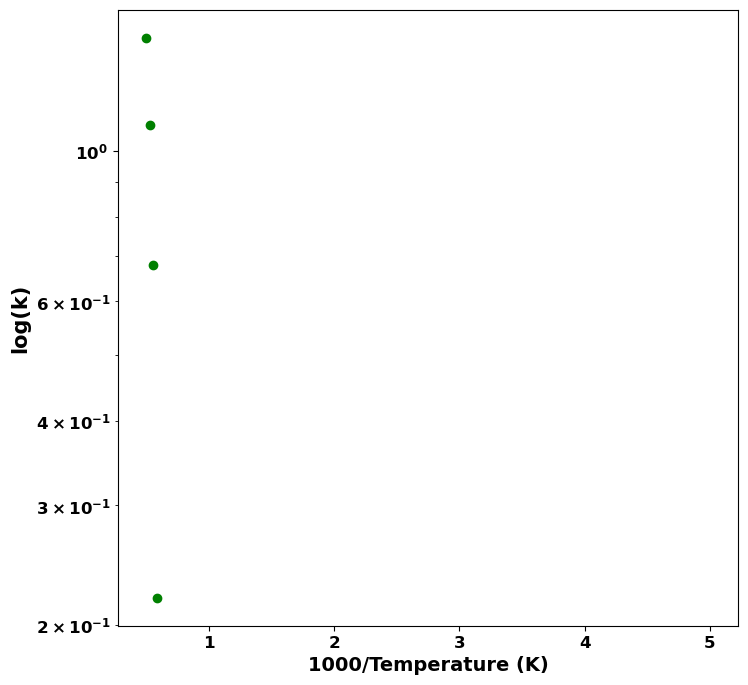

In [49]:
fig = plt.figure(figsize=[8,8])
ax1 = fig.add_subplot(111) 

temps = [200,300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]



for temp in temps: 
    
    rxn_old = Arrhenius(A=(3.832360e+15,'cm^3/(mol*s)'), n=-0.546, Ea=(0.0,'kcal/mol'), T0=(1.0, 'K'))
    old = rxn_old.get_rate_coefficient(temp, 101325)
    rxn_new = Arrhenius(A=(184.993,'cm^3/(mol*s)'), n=3.31954, Ea=(220.392,'kJ/mol'), T0=(1,'K'), Tmin=(298,'K'), Tmax=(2500,'K'))
    new = rxn_new.get_rate_coefficient(temp, 101325)
    #print(old, new)

    #ax1.semilogy(1000/temp, np.log10(old), 'o', color='r', label='old rxn')
    ax1.semilogy(1000/temp, np.log10(new), 'o', color='g', label='new rxn')
    print(temp, old, new)
    
plt.xlabel('1000/Temperature (K)',fontweight='bold', fontsize=14)
plt.ylabel('log(k)',fontweight='bold', fontsize=15)
#plt.ylim(0.000000001,100000000)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# #plt.title('2,3,3,3-tetrafluoropropane Flamespeeds', fontsize = 12, fontweight='bold')
# #ax1.legend(custom_lines, ['RMG','RMG (Needham core)', 'Needham', 'NIST', '$X_{oxygen}$ = .50','$X_{oxygen}$ = .35'], bbox_to_anchor=(0.5, 0.5))
# ax1.legend(custom_lines, ['Current Improvements to Needham', 'NIST', 'Needham', '$X_{oxygen}$ = .50, model','$X_{oxygen}$ = .39, model',  '$X_{oxygen}$ = .50, exp.','$X_{oxygen}$ = .39, exp.'], bbox_to_anchor=(0.65, 0.7), framealpha=1, fontsize=14)

#temp, old, new

In [ ]:
!conda install ase -y